<a href="https://colab.research.google.com/github/Shiyue-wq/Codes_Record/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [63]:
import seaborn as sns
import numpy as np

import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [71]:
penguins_ori = seaborn.load_dataset("penguins")

In [65]:
penguins_ori = sns.load_dataset("penguins")
print("*"*65,'\n')
print("Q2.1.1 Data Preprocessing")


print(" Number of data points in the whole dataset originally: ", len(penguins_ori))
penguins = penguins_ori.dropna().copy()
print(" Number of data points in the whole dataset after deleting incomplete data: ", len(penguins))
#Convert string features into numerical

penguins.loc[penguins['island'] == 'Biscoe', 'island'] = 0
penguins.loc[penguins['island'] == 'Torgersen', 'island'] = 1
penguins.loc[penguins['island'] == 'Dream', 'island'] = 2

penguins.loc[penguins['sex'] == 'Female', 'sex'] = 0
penguins.loc[penguins['sex'] == 'Male', 'sex'] = 1


X, y = make_classification(n_samples=333, n_features=6, n_informative=6,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(" Number of data points in the training set after splitting", len(X_train))
print(" Number of data points in the testing set after splitting", len(X_test))


print('\n',"*"*65)

***************************************************************** 

Q2.1.1 Data Preprocessing
 Number of data points in the whole dataset originally:  344
 Number of data points in the whole dataset after deleting incomplete data:  333
 Number of data points in the training set after splitting 233
 Number of data points in the testing set after splitting 100

 *****************************************************************


***************************************************************** 

Q2.1.2 Data Statistics:


Figure 1


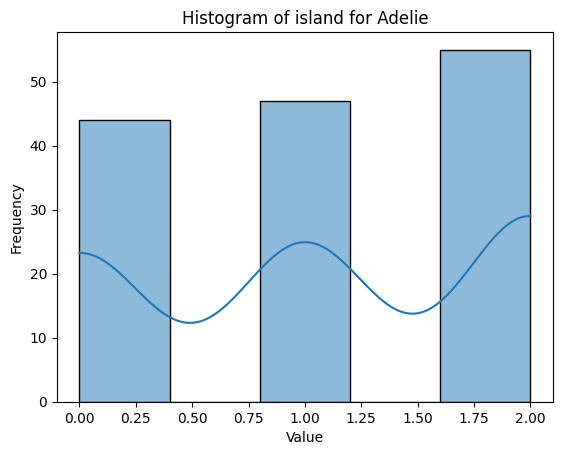

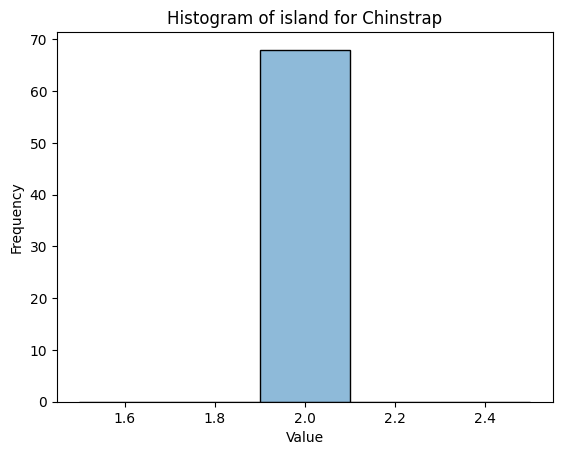

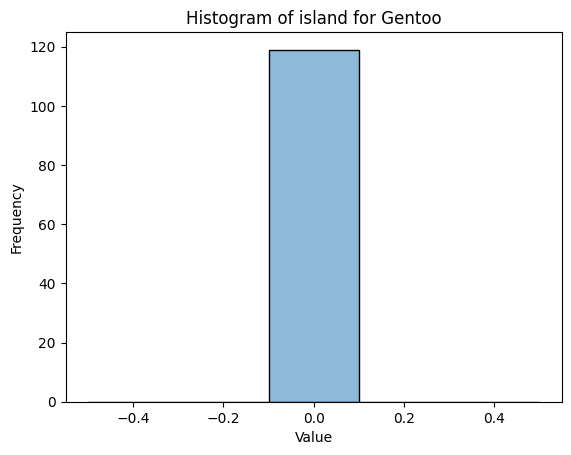





Figure 2


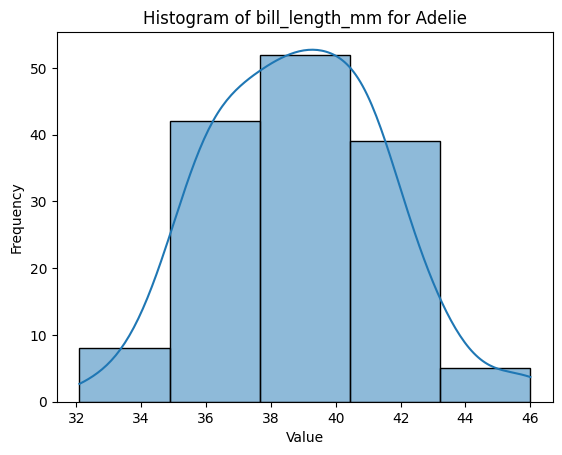

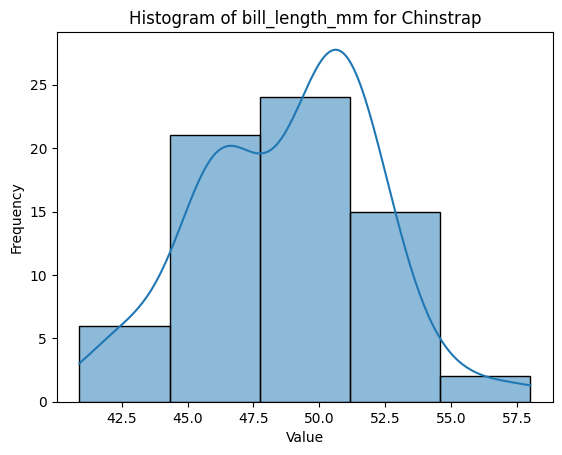

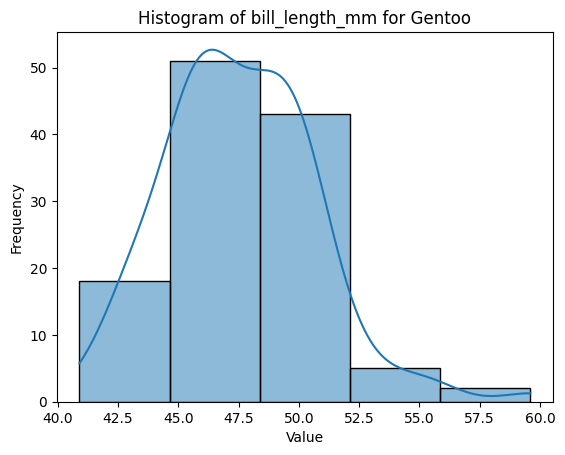





Figure 3


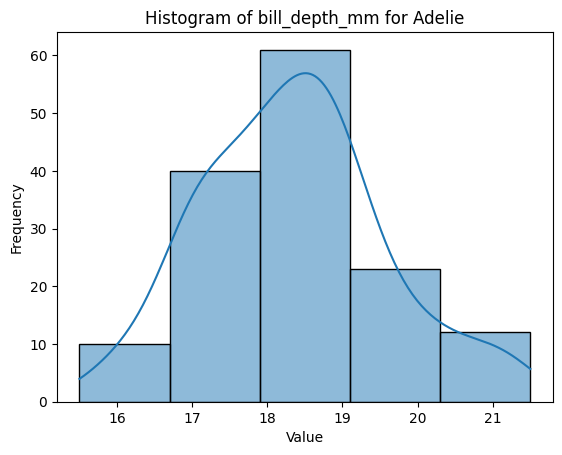

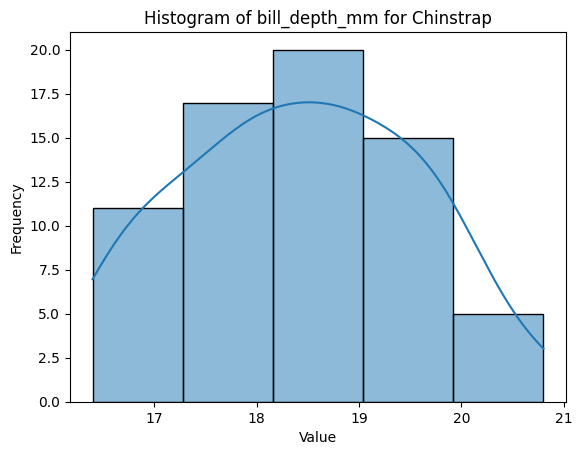

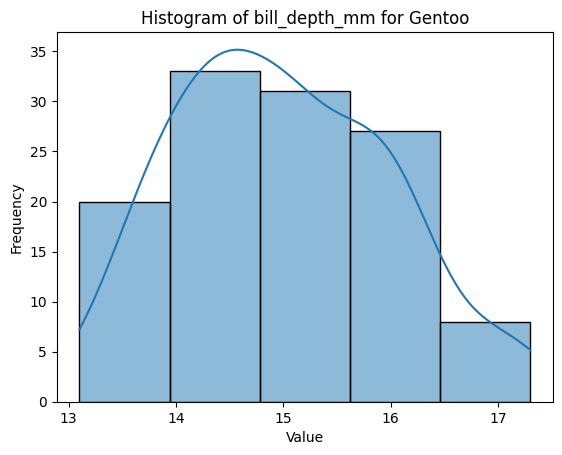





Figure 4


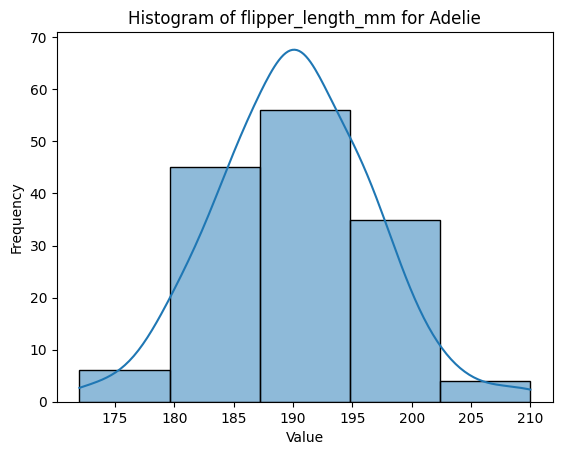

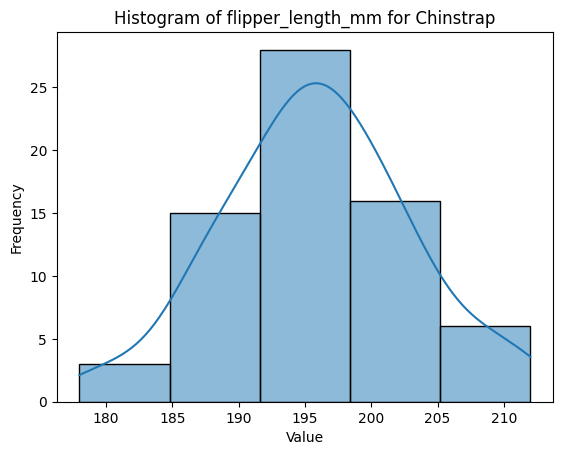

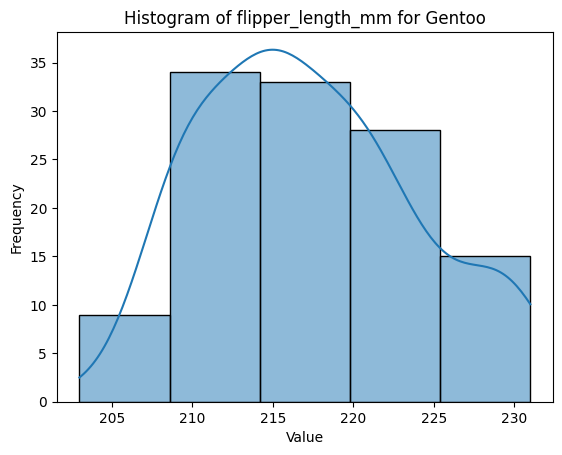





Figure 5


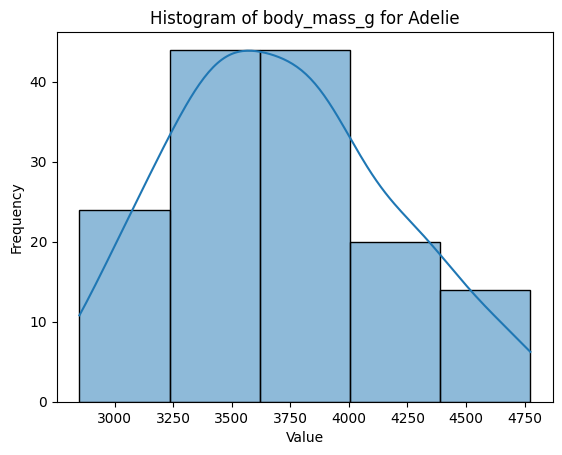

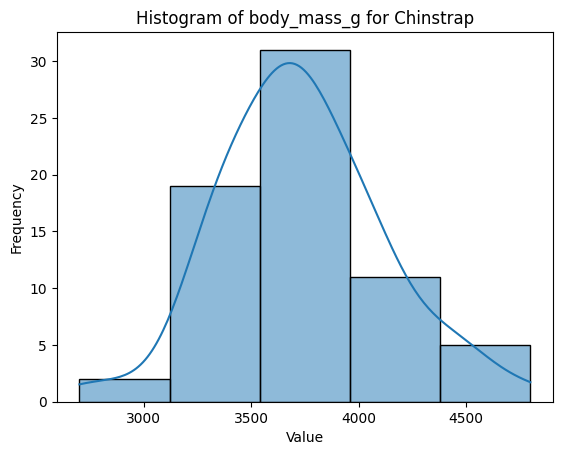

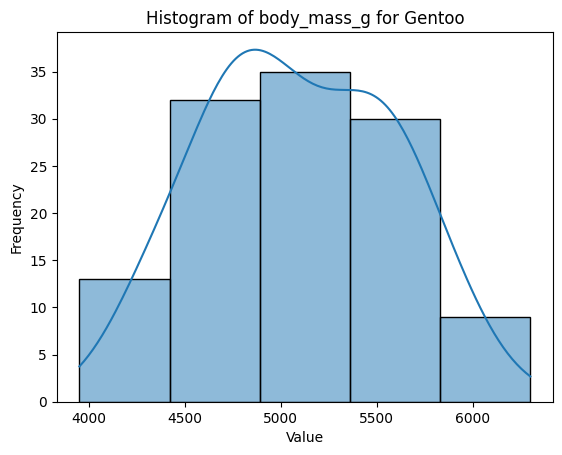





Figure 6


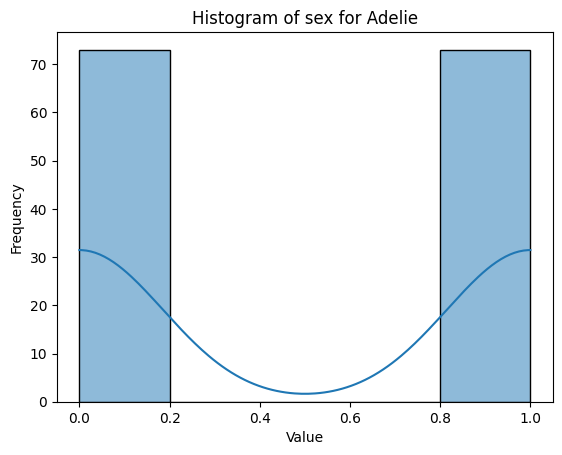

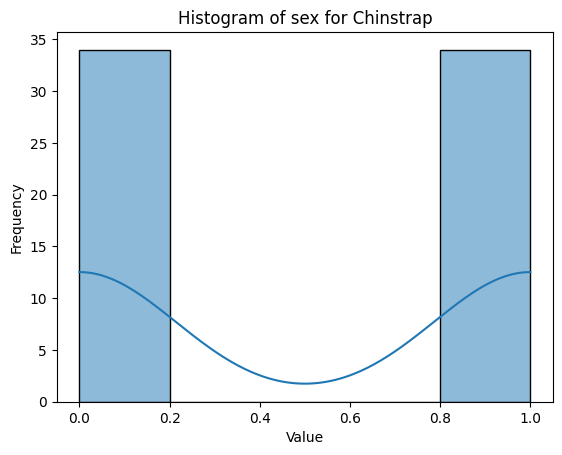

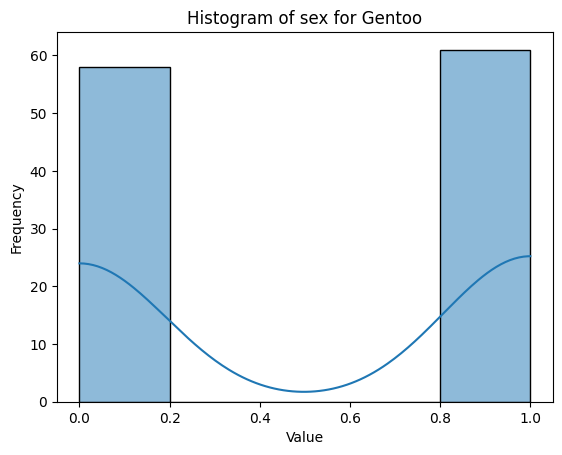




 *****************************************************************


In [66]:
print("*"*65,'\n')
print("Q2.1.2 Data Statistics:")

class_type = penguins['species'].unique()
feature = list(penguins.columns)[1:]

count = 0
for fea in feature:
  count += 1
  print('\n')
  print("Figure", count)
  data = penguins[fea]
  for spicies in class_type:
    sns.histplot(data[penguins['species'] == spicies], bins=5, kde=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {fea} for {spicies}')
    plt.show()
    plt.close()
  print('\n')


print('\n',"*"*65)

***************************************************************** 

Q2.1.3 Decision Tree: 

1 . Results with maximum depth as 3 and least node size as 25:
Training Accuracy: 0.6566523605150214 Test Accuracy: 0.55


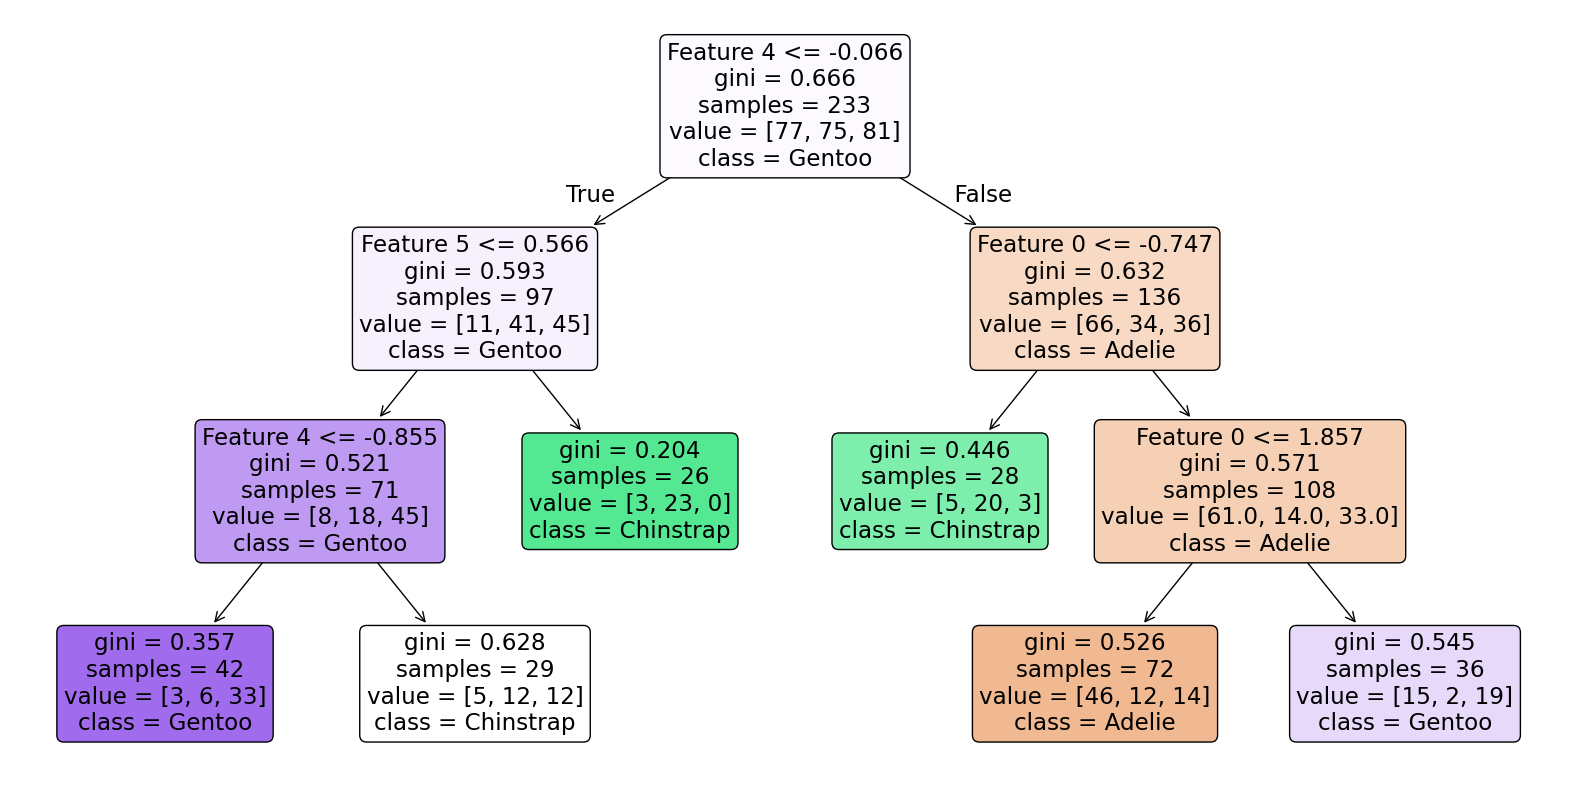



2 . Results with maximum depth as 3 and least node size as 15:
Training Accuracy: 0.6566523605150214 Test Accuracy: 0.55


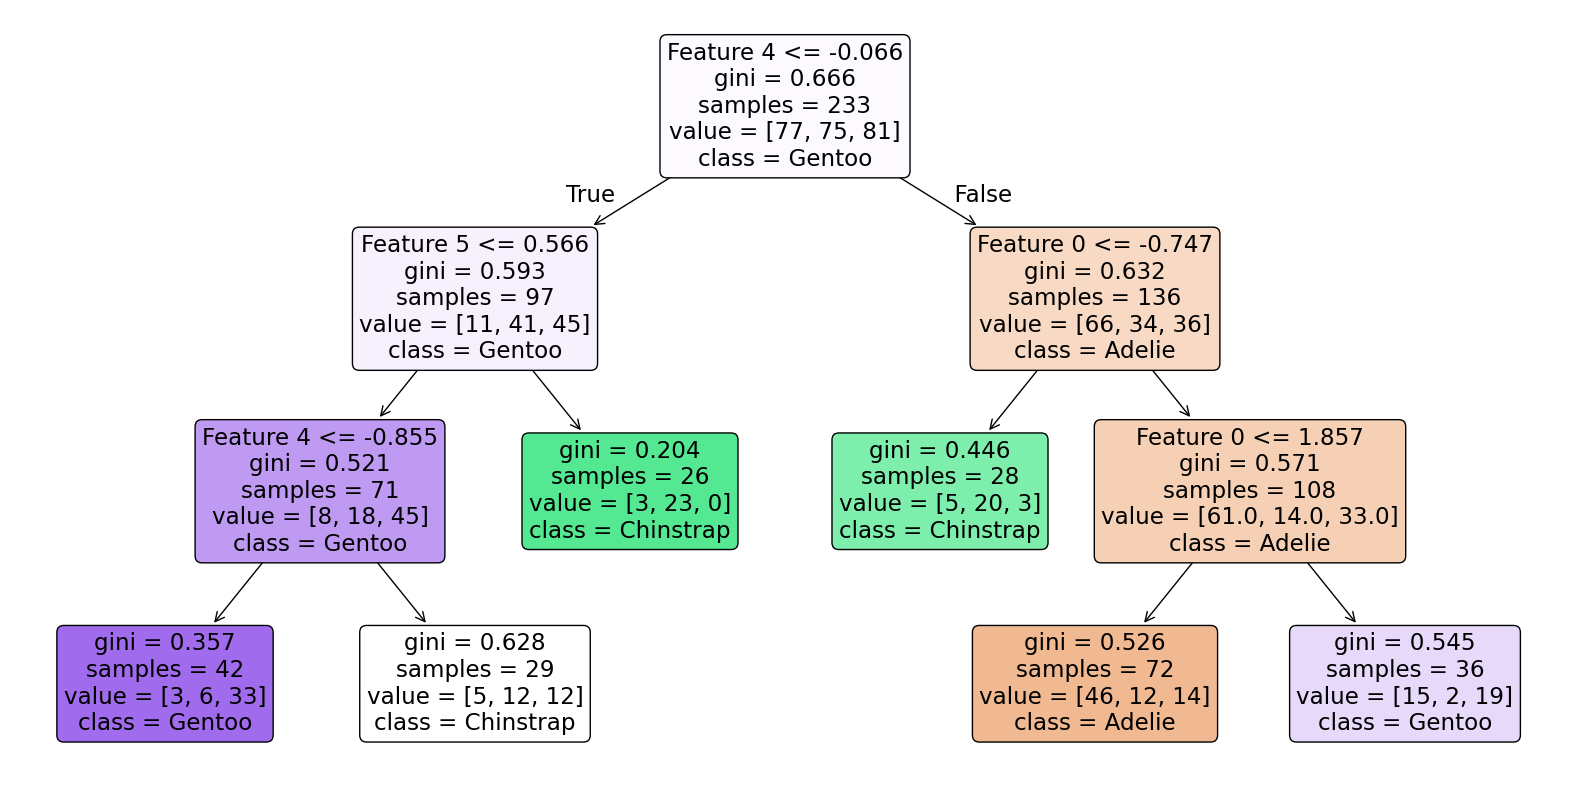



3 . Results with maximum depth as 3 and least node size as 5:
Training Accuracy: 0.6824034334763949 Test Accuracy: 0.6


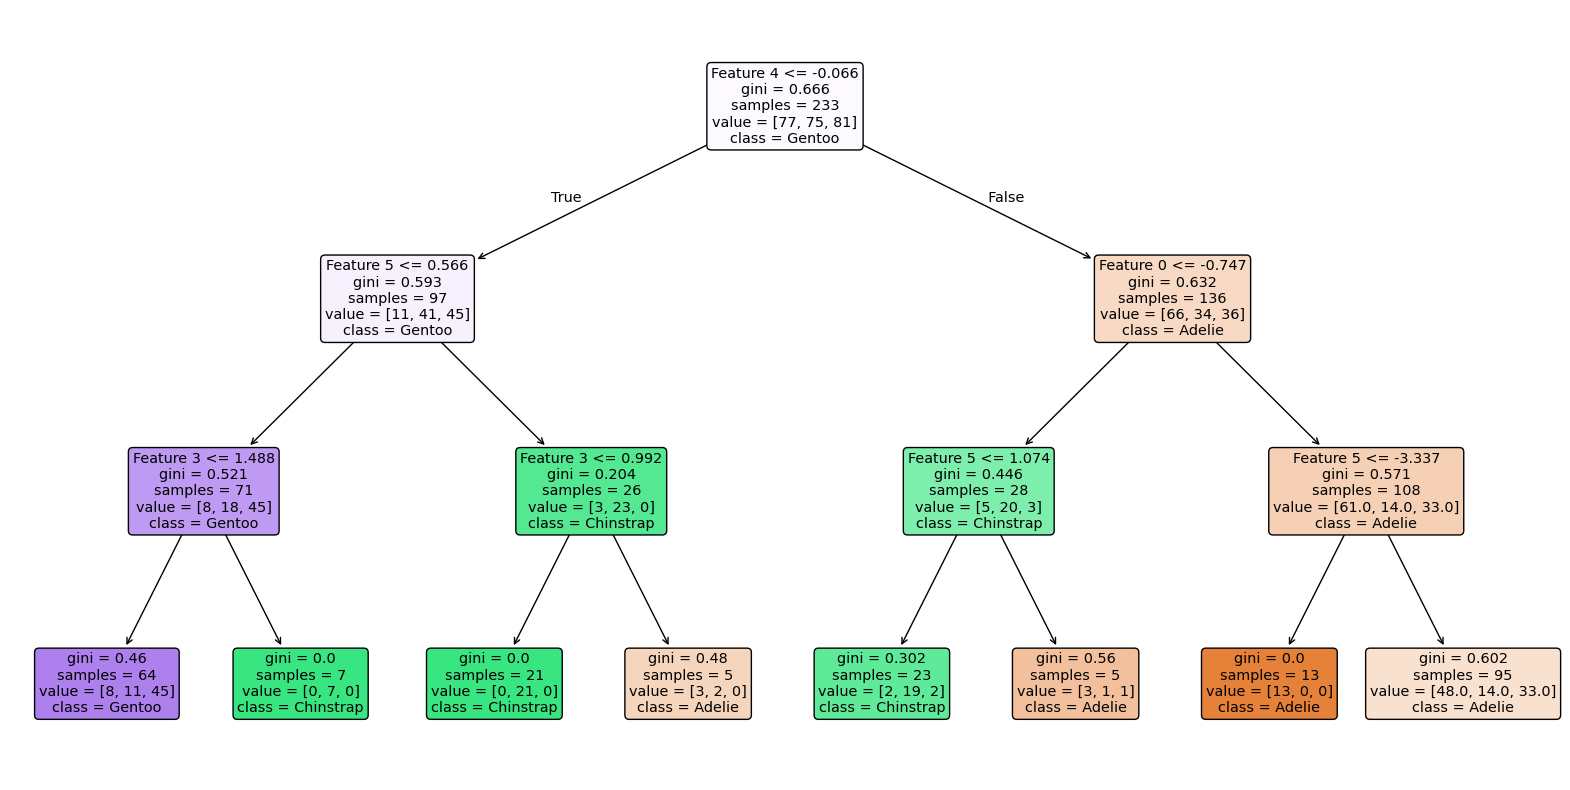



4 . Results with maximum depth as 6 and least node size as 25:
Training Accuracy: 0.6566523605150214 Test Accuracy: 0.55


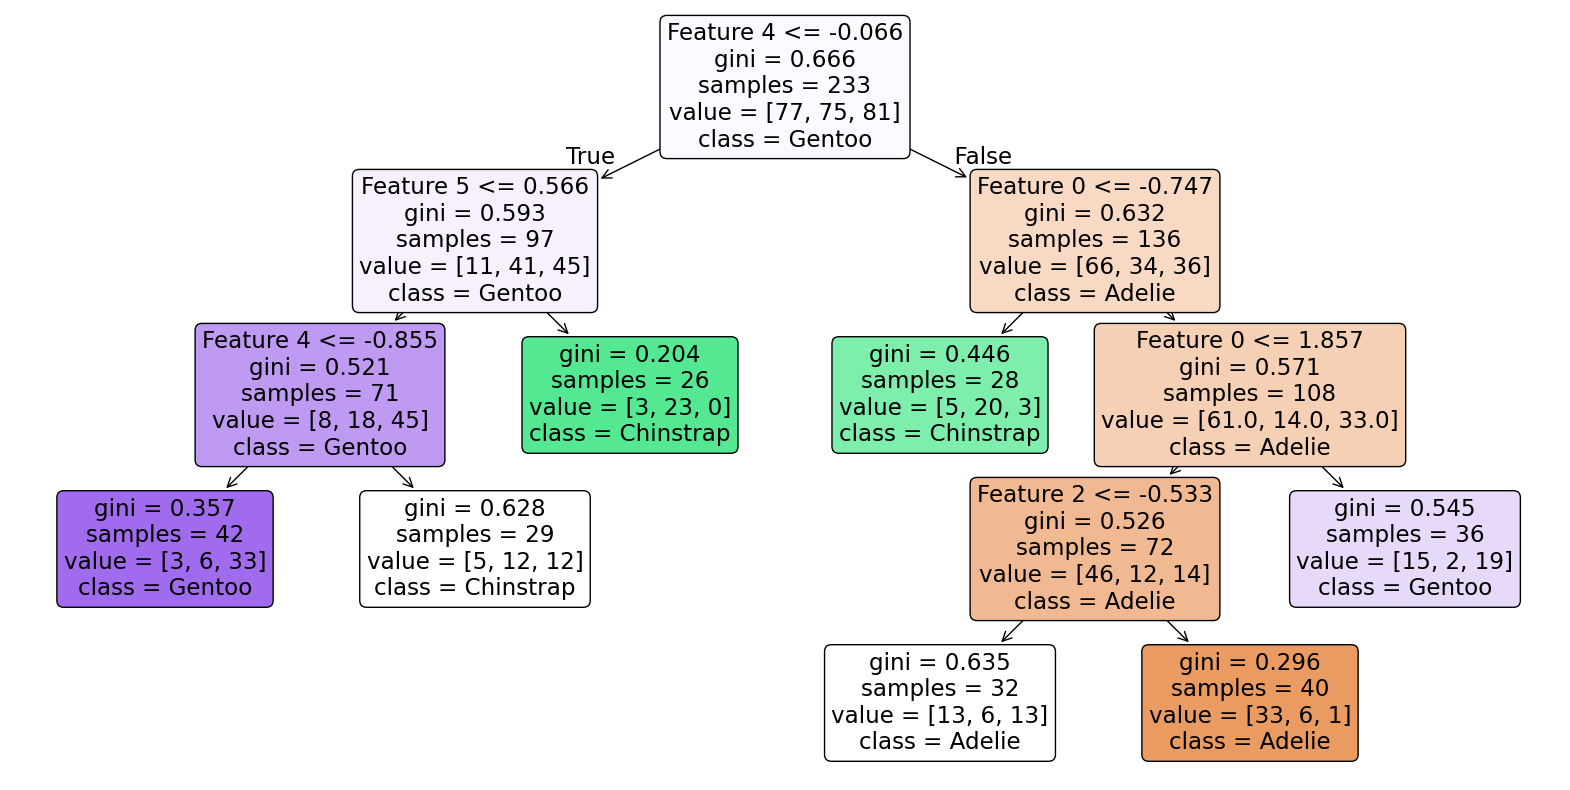



5 . Results with maximum depth as 6 and least node size as 15:
Training Accuracy: 0.759656652360515 Test Accuracy: 0.62


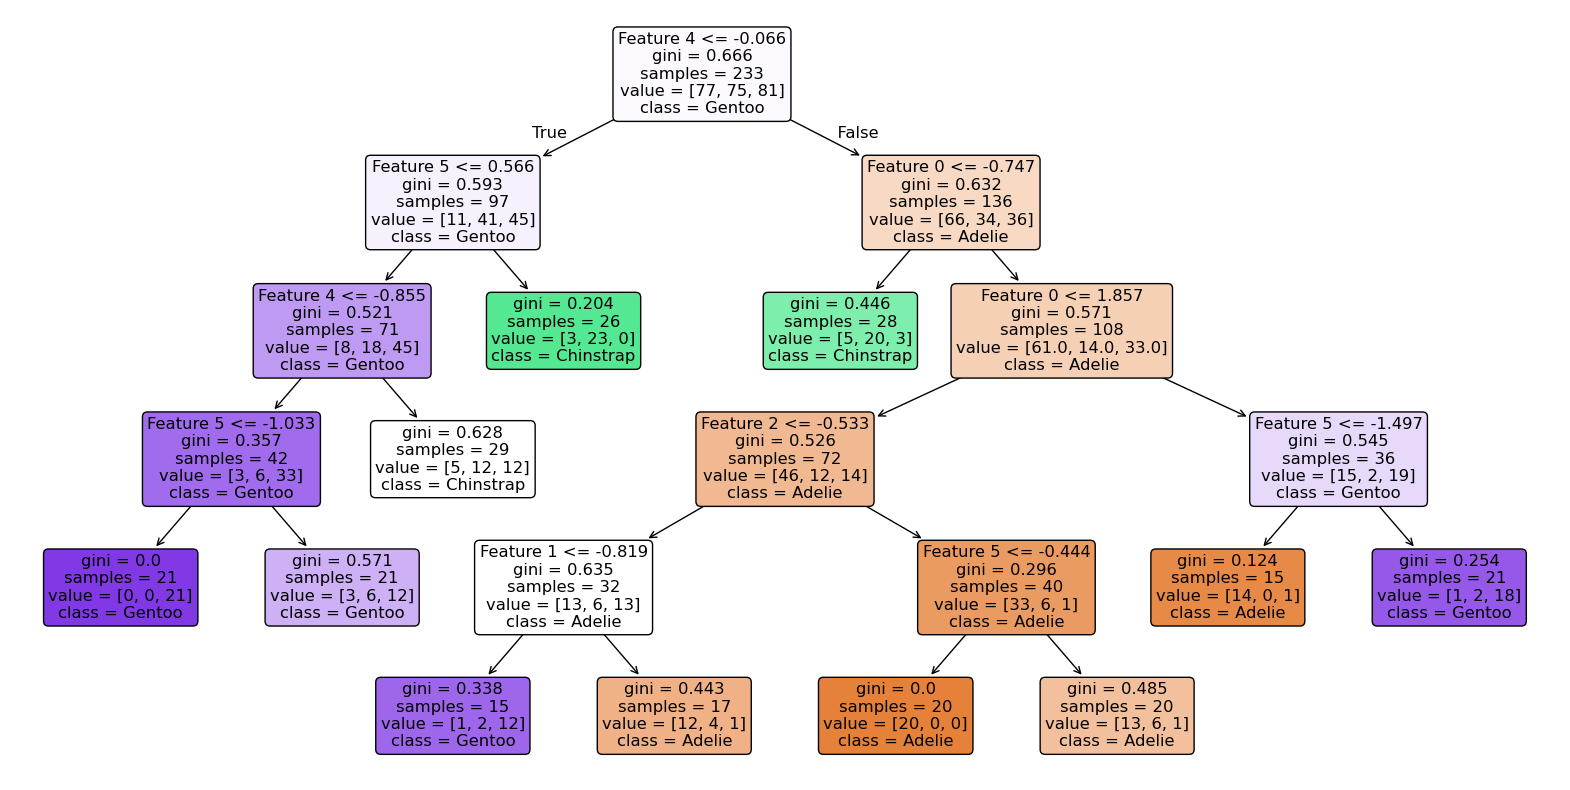



6 . Results with maximum depth as 6 and least node size as 5:
Training Accuracy: 0.8454935622317596 Test Accuracy: 0.66


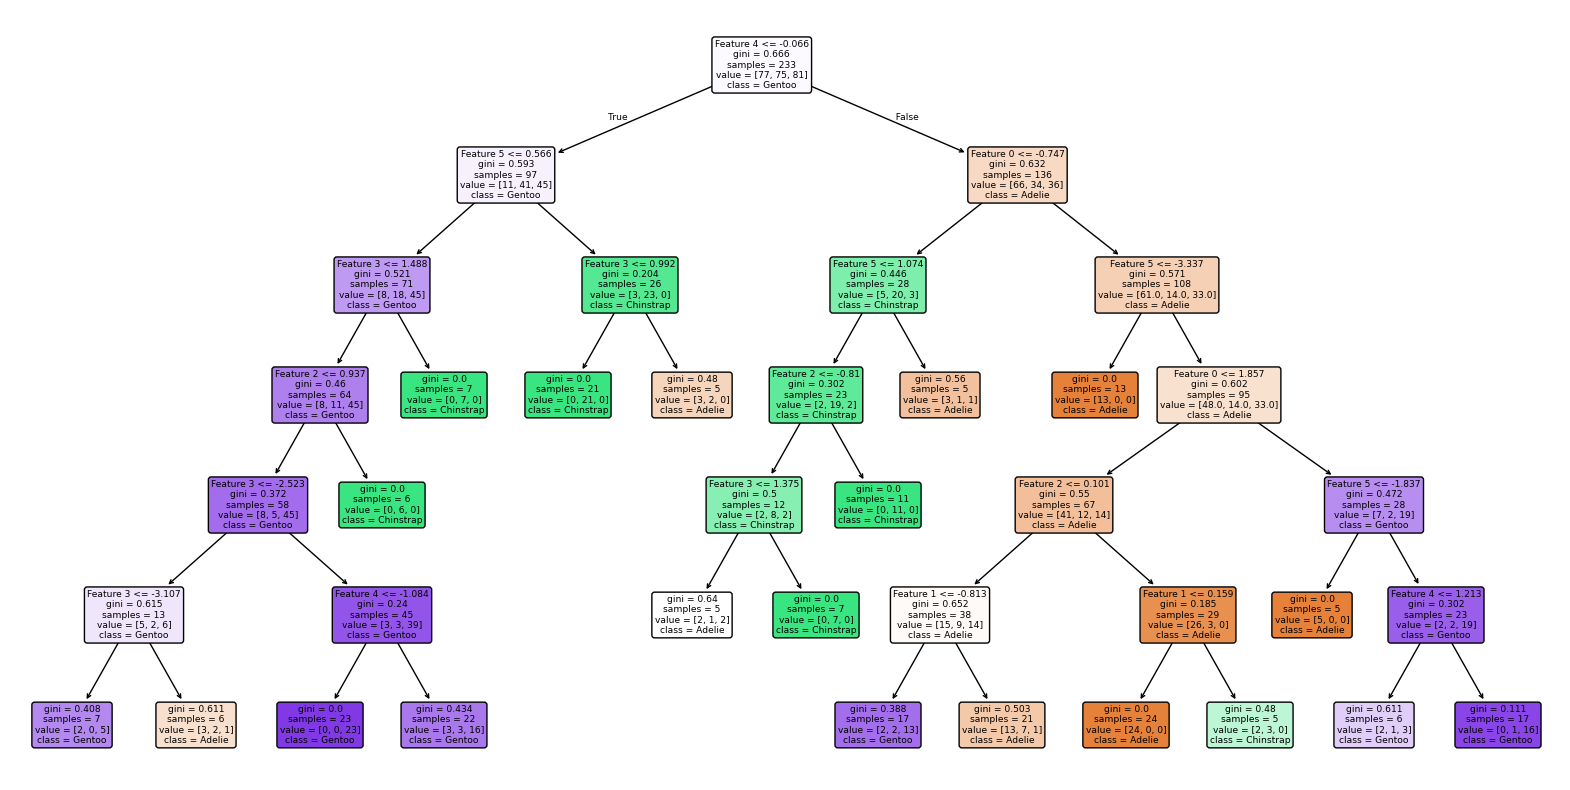



7 . Results with maximum depth as 9 and least node size as 25:
Training Accuracy: 0.6566523605150214 Test Accuracy: 0.55


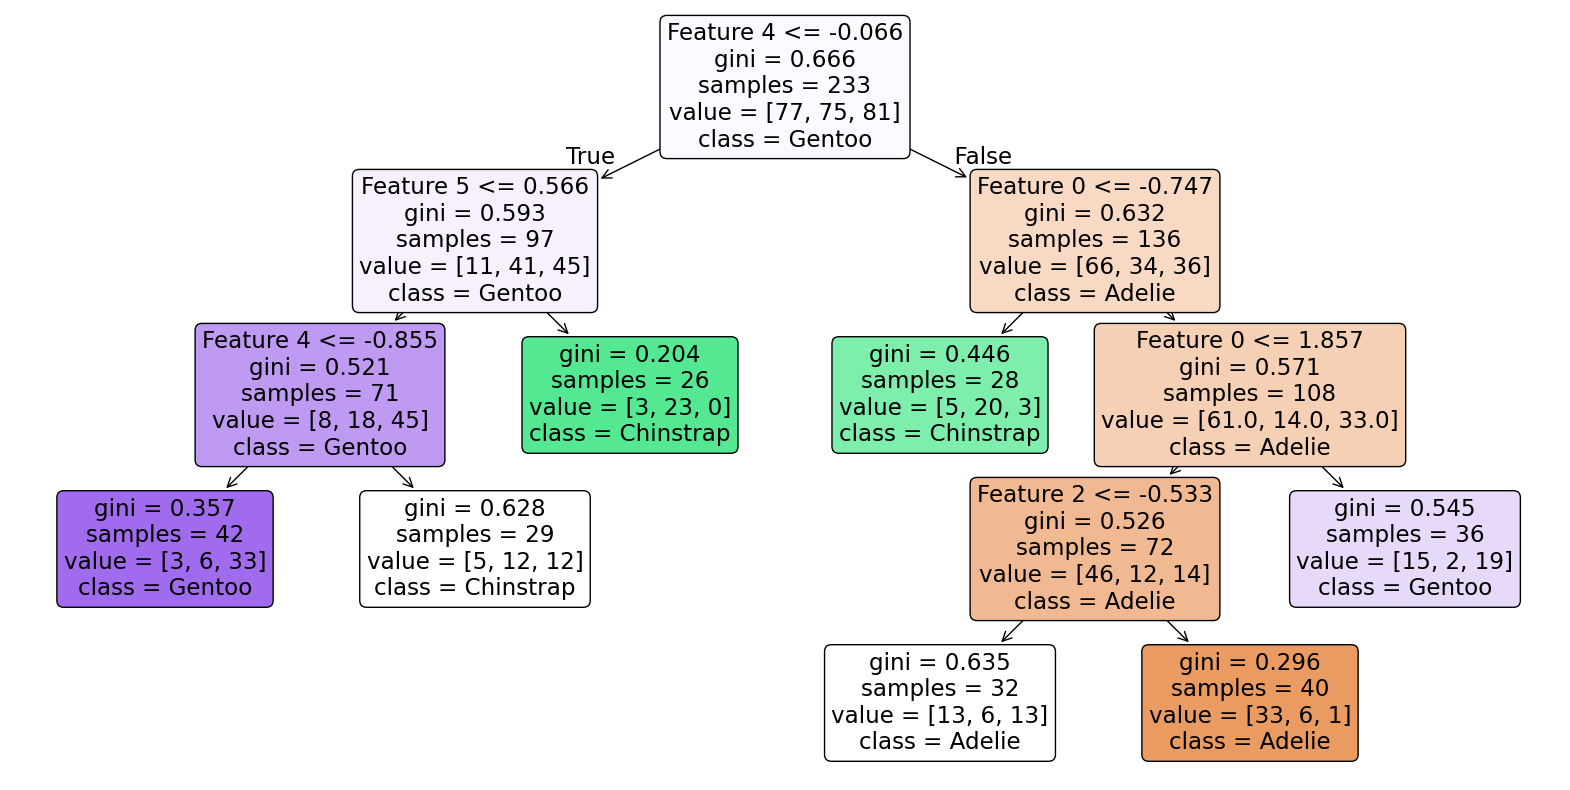



8 . Results with maximum depth as 9 and least node size as 15:
Training Accuracy: 0.759656652360515 Test Accuracy: 0.62


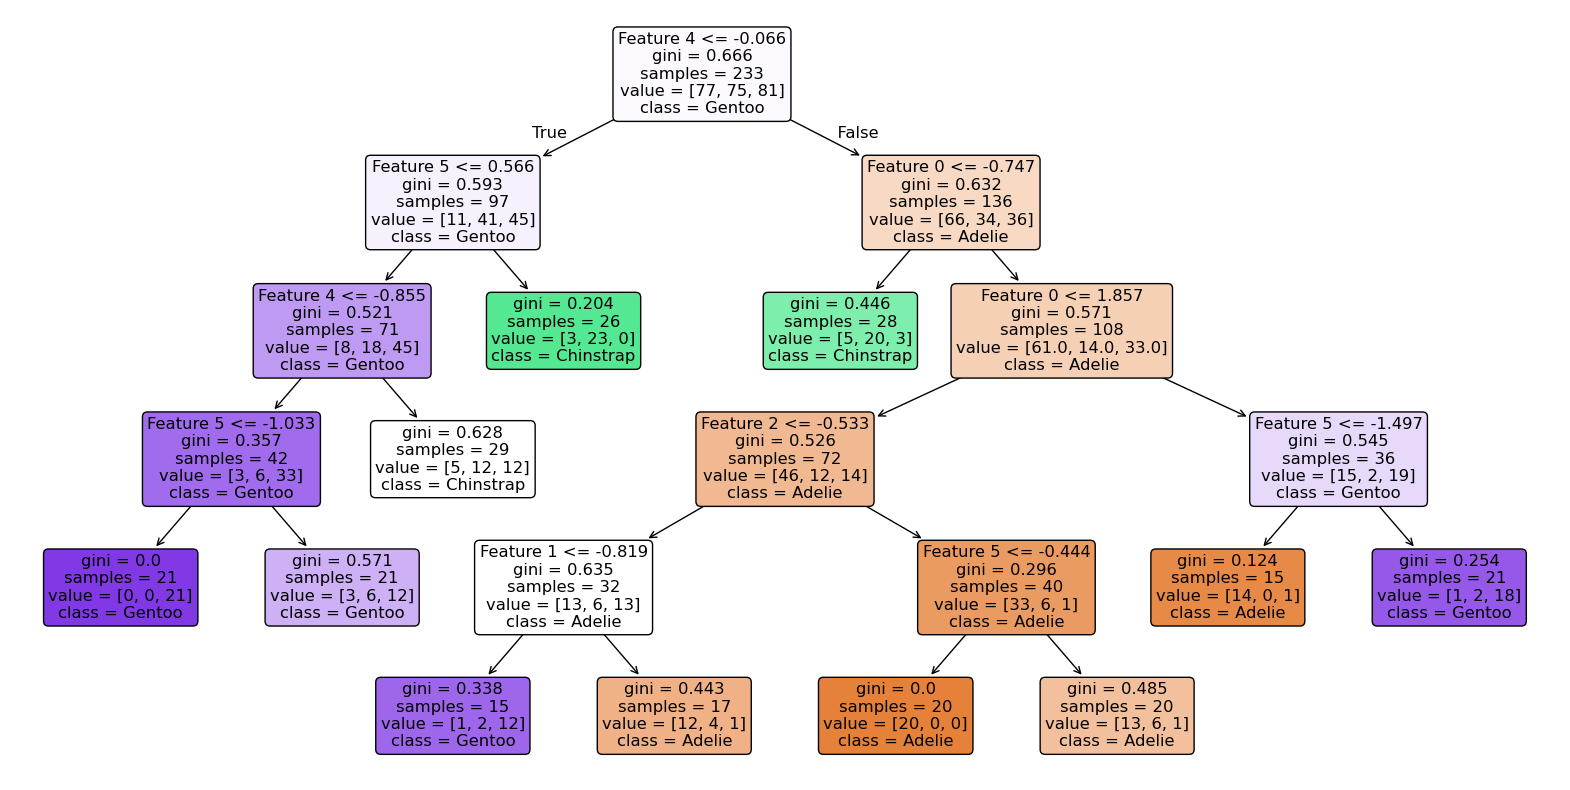



9 . Results with maximum depth as 9 and least node size as 5:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.65


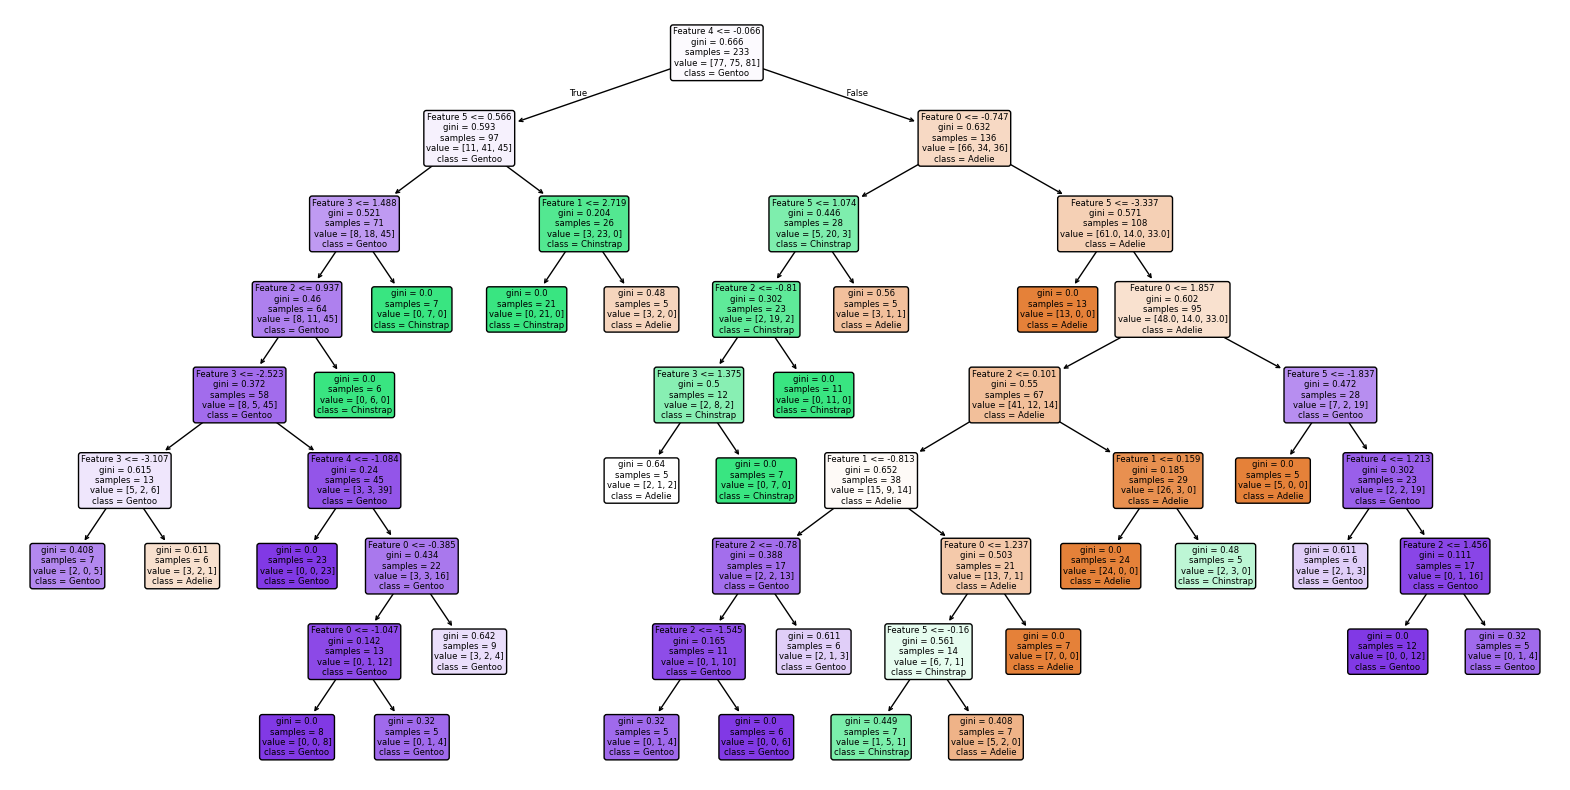




 *****************************************************************


In [67]:
print("*"*65,'\n')
print("Q2.1.3 Decision Tree:",'\n')


depth = [3, 6, 9] #Maximum depth
node_size = [25, 15, 5] #least node sizes


count = 0

for dep in depth:
  for size in node_size:
    count += 1
    print(count,'.',f"Results with maximum depth as {dep} and least node size as {size}:")
    clf = DecisionTreeClassifier(max_depth=dep, min_samples_leaf=size)
    clf.fit(X_train, y_train)

    #Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)


    #Test accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Training Accuracy:", train_accuracy,"Test Accuracy:", test_accuracy)

    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], class_names=class_type, rounded=True)
    plt.show()
    plt.close()
    print('\n')


print('\n',"*"*65)

In [68]:
print("*"*65,'\n')
print("Q2.1.4 Bagging of Trees::",'\n')


depth = [4, 8, 12]
trees_num = [20, 15, 10]


count = 0
for i in depth:
  for j in trees_num:
    count += 1
    print(count,'.',f"Results with maximum depth as {i} and number of trees as {j}:")
    bagging_clf = BaggingClassifier(
        estimator = DecisionTreeClassifier(max_depth = i, random_state = 42),
        n_estimators = j,
        random_state = 42
    )
    bagging_clf.fit(X_train, y_train)

    y_train_pred = bagging_clf.predict(X_train)
    train_accuray = accuracy_score(y_train, y_train_pred)

    y_test_pred = bagging_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Training Accuracy:", train_accuracy,"Test Accuracy:", test_accuracy,'\n')



print('\n',"*"*65)

***************************************************************** 

Q2.1.4 Bagging of Trees:: 

1 . Results with maximum depth as 4 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.69 

2 . Results with maximum depth as 4 and number of trees as 15:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.69 

3 . Results with maximum depth as 4 and number of trees as 10:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.71 

4 . Results with maximum depth as 8 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.81 

5 . Results with maximum depth as 8 and number of trees as 15:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.8 

6 . Results with maximum depth as 8 and number of trees as 10:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.81 

7 . Results with maximum depth as 12 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.8 

8 . Results with maximum depth as 12 and num

In [69]:
print("*"*65,'\n')
print("Q2.1.5 Random Forests:",'\n')


depth = [4, 8, 12]
trees_num = [20, 15, 10]


count = 0
for i in depth:
  for j in trees_num:
    count += 1
    print(count,'.',f"Results with maximum depth as {i} and number of trees as {j}:")
    rand_clf = RandomForestClassifier(
        n_estimators = j,
        max_depth = i,
        random_state = 42
    )
    rand_clf.fit(X_train, y_train)

    y_train_pred = rand_clf.predict(X_train)
    train_accuray = accuracy_score(y_train, y_train_pred)

    y_test_pred = rand_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Training Accuracy:", train_accuracy,"Test Accuracy:", test_accuracy,'\n')



print('\n',"*"*65)

***************************************************************** 

Q2.1.5 Random Forests: 

1 . Results with maximum depth as 4 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.71 

2 . Results with maximum depth as 4 and number of trees as 15:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.7 

3 . Results with maximum depth as 4 and number of trees as 10:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.65 

4 . Results with maximum depth as 8 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.74 

5 . Results with maximum depth as 8 and number of trees as 15:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.73 

6 . Results with maximum depth as 8 and number of trees as 10:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.75 

7 . Results with maximum depth as 12 and number of trees as 20:
Training Accuracy: 0.8626609442060086 Test Accuracy: 0.77 

8 . Results with maximum depth as 12 and numbe

***************************************************************** 

Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests: 

Bias_squared - trees:


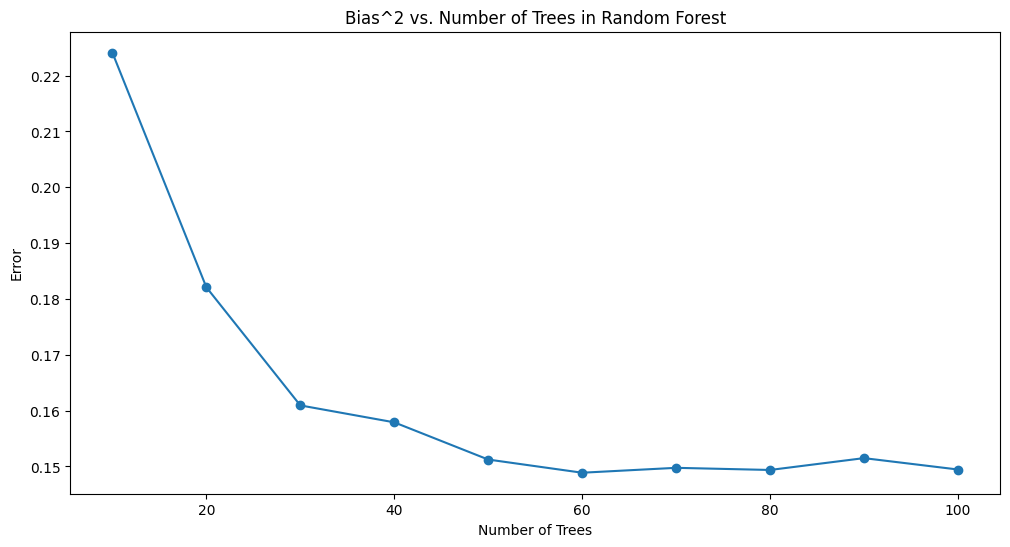

Bias^2 decreases as the number of trees increases. With more trees, the ensemble model better captures the data structure, reducing bias.


Variance - trees:


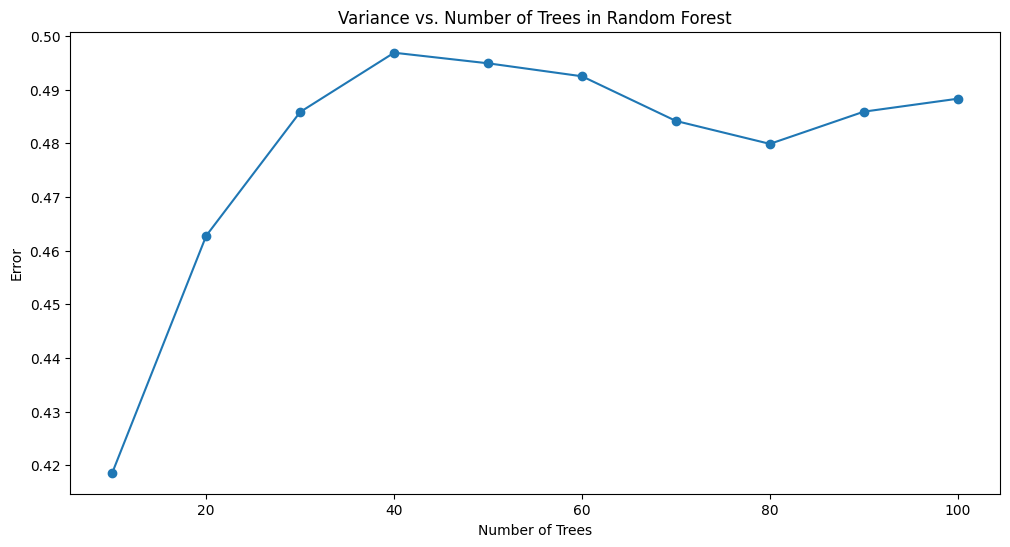

Variance increases initially, then stabilizes as the number of trees grows. Variance typically does not increase significantly with the number of trees due to averaging, which reduces the model’s overall sensitivity to individual training samples.

 *****************************************************************


In [70]:
print("*"*65,'\n')
print("Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:",'\n')

n_trees_list = range(10, 110, 10)
bias_squared = []
variance = []

for trees in n_trees_list:
    rf = RandomForestClassifier(n_estimators=trees, max_depth=6, random_state=42, oob_score=True)
    rf.fit(X_train, y_train)

    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)

    # Calculate bias^2
    avg_prediction = np.mean([tree.predict(X_test) for tree in rf.estimators_], axis=0)
    bias_squared.append(mean_squared_error(y_test, avg_prediction)**2)

    # Calculate variance
    variance_values = [mean_squared_error(y_pred, avg_prediction) for y_pred in [tree.predict(X_test) for tree in rf.estimators_]]
    variance.append(np.mean(variance_values))


print("Bias_squared - trees:")
plt.figure(figsize=(12, 6))
plt.plot(n_trees_list, bias_squared, label="bias_squared", marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Bias^2 vs. Number of Trees in Random Forest')
plt.show()
plt.close()
print("Bias^2 decreases as the number of trees increases. With more trees, the ensemble model better captures the data structure, reducing bias.")

print('\n')
print("Variance - trees:")
plt.figure(figsize=(12, 6))
plt.plot(n_trees_list, variance, label='variance', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Variance vs. Number of Trees in Random Forest')
plt.show()
plt.close()
print("Variance increases initially, then stabilizes as the number of trees grows. Variance typically does not increase significantly with the number of trees due to averaging, which reduces the model’s overall sensitivity to individual training samples.")


print('\n',"*"*65)